# Set variables and Import libraries

Please provide the absolute path to your HINGE installation

In [1]:
path_to_hinge = '~/HINGE-analyses/HINGE/'

The required packages are listed in requirements.txt.
The following imports verify that these requirements are properly installed

In [6]:
import os
import cython
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
import random 
import forceatlas2 
import ujson
import Bio
import colormap
import easydev

In [3]:
os.system('mkdir -p data')

0

# Choose NCTC datasets

The NCTC datasets to be downloaded and assembled are in NCTC_names.txt

In [4]:
!head NCTC_names.txt

NCTC9657
NCTC9964
NCTC11022


# Download the relevant files

We use [aspera](http://downloads.asperasoft.com/en/downloads/8?list) to download. Once installed on a Linux machine, the default path to the aspera license is `~/.aspera/connect/etc/asperaweb_id_dsa.openssh`.
Other ways to download the relevant files from the accession numbers in the paper can be found [here](https://www.ebi.ac.uk/ena/browse/read-download). 

In [ ]:
path_to_aspera_licence = '~/.aspera/connect/etc/asperaweb_id_dsa.openssh'

In [5]:
download_cmd = 'python download_wrapper.py '+ path_to_aspera_licence
os.system(download_cmd)

0

# Obtain the overlaps

In [7]:
overlap_cmd = 'python overlap_wrapper.py'
os.system(overlap_cmd)

0

# Download NCTC assemblies and extract fastas

In [23]:
assembly_download_cmd = 'python download_assemblies.py'
assembly_extract_cmd = 'python get_hgap_fastas.py'
os.system(assembly_download_cmd)
os.system(assembly_extract_cmd)

0

In [29]:
map_cmd = 'python map_wrapper.py '+path_to_hinge
os.system(map_cmd)

0

# Run Layout and overlay NCTC assembly colours

In [31]:
layout_cmd = 'python pipeline_layout_wrapper.py '+path_to_hinge
os.system(layout_cmd)

0

# Generate sequence consensus

In [37]:
consensus_cmd = 'python pipeline_consensus_wrapper.py '+path_to_hinge
os.system(consensus_cmd)

0

# Draw NCTC9657

First we use ForceAtlas2 to generate a visually interpretable graph. This step may take ~10 minutes to run.

In [7]:
H9657 = nx.read_graphml('data/NCTC9657/NCTC9657A.G2c.graphml')
G9657 = H9657.to_undirected()
pos = { i : (random.random(), random.random()) for i in G9657.nodes()} 
l9657 = forceatlas2.forceatlas2_networkx_layout(G9657, pos, niter=10000) 

We then use the information from the alignment to the hgap (NCTC pipeline) contigs to color the nodes.

In [8]:
%matplotlib inline

max_chr = 1
for x in H9657.nodes():
    try:
        max_chr = max(max_chr,H9657.node[x.lstrip('B')]['chr'])
    except:
        pass
chr_lengths = [0]*max_chr
for x in H9657.nodes():
        try:
            chr_num = H9657.node[x.lstrip('B')]['chr']
            chr_lengths[chr_num-1] = max(chr_lengths[chr_num-1],H9657.node[x.lstrip('B')]['aln_end'])
        except:
            pass

color_map9657 = {}
for x in H9657.nodes():
    try:
        chr_num = H9657.node[x.lstrip('B')]['chr']
        color_map9657[x] = sum(chr_lengths[0:chr_num-1]) + (chr_num-1)*600000 + H9657.node[x.lstrip('B')]['aln_end']
        
    except:
        color_map9657[x] = 5

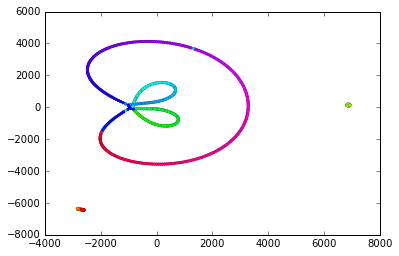

In [9]:
color_max = max(color_map9657.values())
values9657 = [color_max - color_map9657.get(node, 1) for node in G9657.nodes()]
nx.draw_networkx(G9657, l9657, with_labels=False, node_color=values9657,cmap = 'hsv',vmin = 0,vmax = color_max, node_size=8,linewidths=0.1) 
plt.show()

# Draw NCTC9964

In [10]:
H9964 = nx.read_graphml('data/NCTC9964/NCTC9964A.G2c.graphml')
G9964 = H9964.to_undirected()
pos = { i : (random.random(), random.random()) for i in G9964.nodes()} 
l9964 = forceatlas2.forceatlas2_networkx_layout(G9964, pos, niter=10000) 

In [11]:
max_chr = 1
for x in H9964.nodes():
    try:
        max_chr = max(max_chr,H9964.node[x.lstrip('B')]['chr'])
    except:
        pass
chr_lengths = [0]*max_chr
for x in H9964.nodes():
        try:
            chr_num = H9964.node[x.lstrip('B')]['chr']
            chr_lengths[chr_num-1] = max(chr_lengths[chr_num-1],H9964.node[x.lstrip('B')]['aln_end'])
        except:
            pass

color_map9964 = {}
for x in H9964.nodes():
    try:
        chr_num = H9964.node[x.lstrip('B')]['chr']
        color_map9964[x] = sum(chr_lengths[0:chr_num-1]) + (chr_num-1)*600000 + H9964.node[x.lstrip('B')]['aln_end']
        
    except:
        color_map9964[x] = 5 

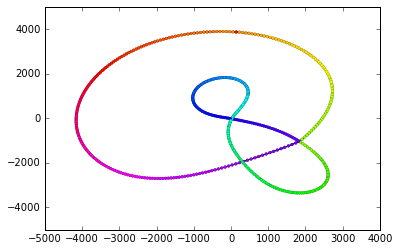

In [12]:
color_max = max(color_map9964.values())
values9964 = [color_max - color_map9964.get(node, 1) for node in G9964.nodes()]
nx.draw_networkx(G9964, l9964, with_labels=False, node_color=values9964,cmap = 'hsv',vmin = 0,vmax = color_max, node_size=8,linewidths=0.1) 
plt.show()

# Draw NCTC11022

In [13]:
H11022 = nx.read_graphml('data/NCTC11022/NCTC11022A.G2c.graphml')
G11022 = H11022.to_undirected()
pos = { i : (random.random(), random.random()) for i in G11022.nodes()} 
l11022 = forceatlas2.forceatlas2_networkx_layout(G11022, pos, niter=10000) 

In [14]:
max_chr = 1
for x in H11022.nodes():
    try:
        max_chr = max(max_chr,H11022.node[x.lstrip('B')]['chr'])
    except:
        pass
chr_lengths = [0]*max_chr
for x in H11022.nodes():
        try:
            chr_num = H11022.node[x.lstrip('B')]['chr']
            chr_lengths[chr_num-1] = max(chr_lengths[chr_num-1],H11022.node[x.lstrip('B')]['aln_end'])
        except:
            pass

color_map11022 = {}
for x in H11022.nodes():
    try:
        chr_num = H11022.node[x.lstrip('B')]['chr']
        color_map11022[x] = sum(chr_lengths[0:chr_num-1]) + (chr_num-1)*600000 + H11022.node[x.lstrip('B')]['aln_end']
        
    except:
        color_map11022[x] = 5 

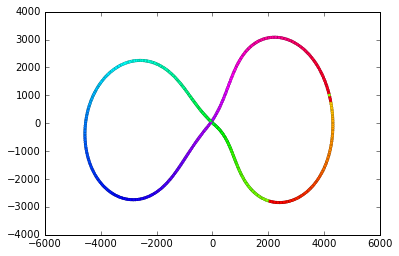

In [15]:
color_max = max(color_map11022.values())
values11022 = [color_max - color_map11022.get(node, 1) for node in G11022.nodes()]
nx.draw_networkx(G11022, l11022, with_labels=False, node_color=values11022,cmap = 'hsv',vmin = 0,vmax = color_max, node_size=8,linewidths=0.1) 
plt.show()